## Checking the impactful columns to decide to drop or keep

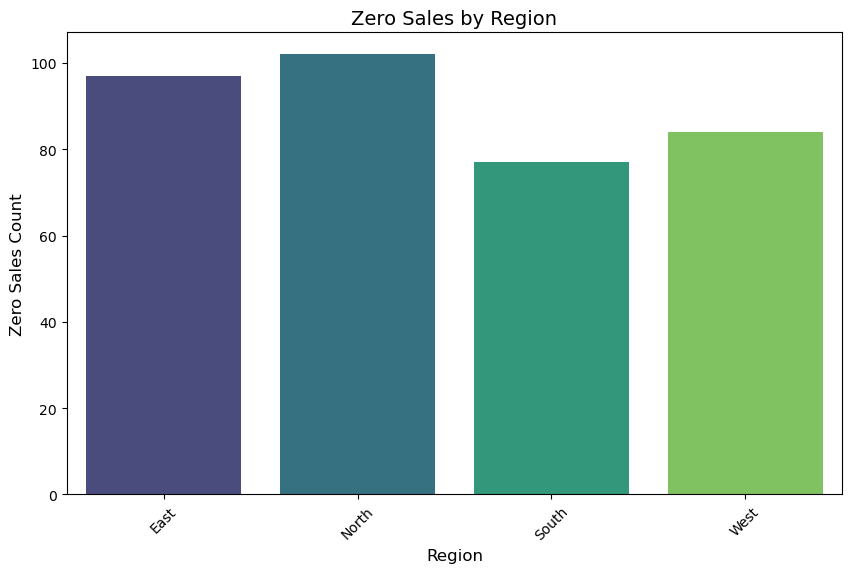

In [6]:
# Group by Region to count the number of zero_sales per region
region_zero_sales = zero_sales.groupby('Region').size().reset_index(name='Zero Sales Count')

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10,6))
sns.barplot(data=region_zero_sales, x='Region', y='Zero Sales Count', hue='Region', palette='viridis', legend=False)


# Adding labels and title
plt.title('Zero Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Zero Sales Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

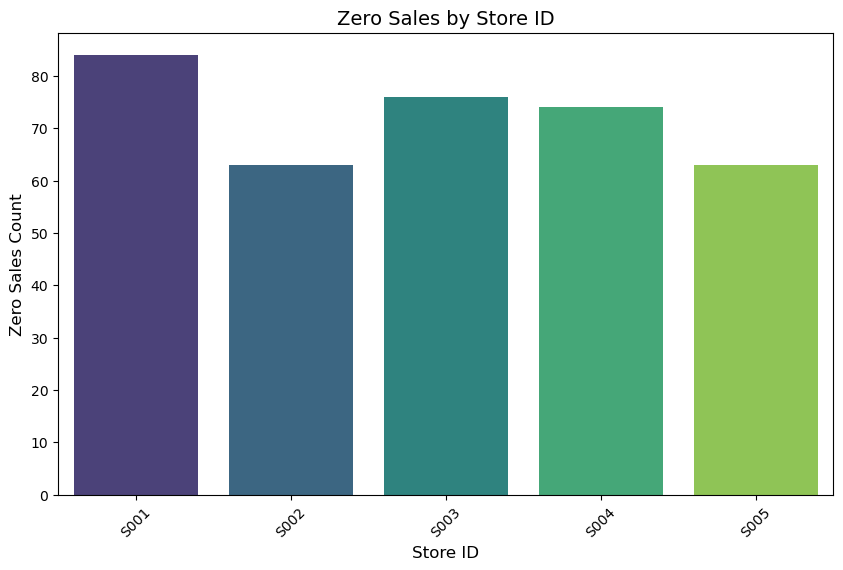

In [7]:
# Group by Store ID to count the number of zero_sales per region
region_zero_sales = zero_sales.groupby('Store ID').size().reset_index(name='Zero Sales Count')

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10,6))
sns.barplot(data=region_zero_sales, x='Store ID', y='Zero Sales Count', hue='Store ID', palette='viridis', legend=False)

# Adding labels and title
plt.title('Zero Sales by Store ID', fontsize=14)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Zero Sales Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp()
zero_sales = df[df['Units Sold'] == 0]
monthly_zero_sales = zero_sales.groupby(['Month', 'Store ID']).size().reset_index(name='Zero Sales Count')

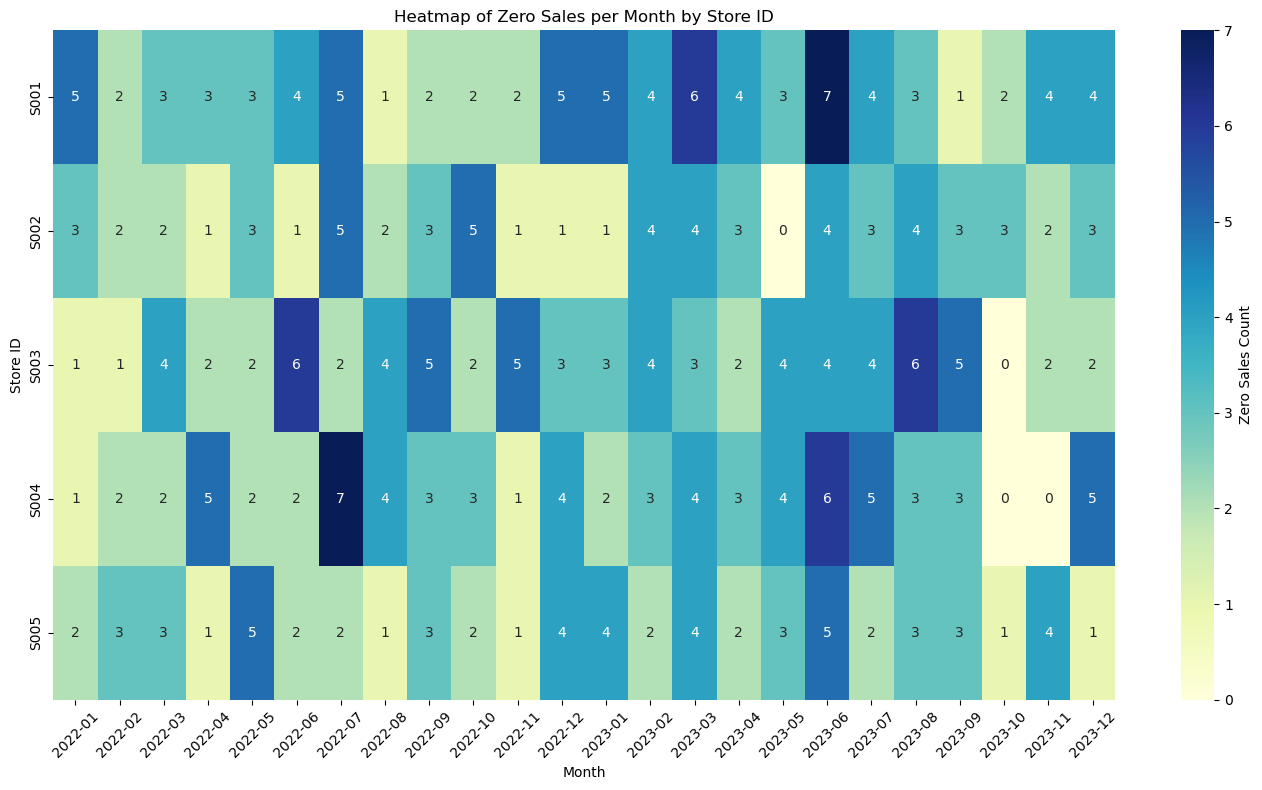

In [9]:
# Format month labels
monthly_zero_sales['Month'] = monthly_zero_sales['Month'].dt.strftime('%Y-%m')

# Pivot for heatmap
pivot_table = monthly_zero_sales.pivot(index='Store ID', columns='Month', values='Zero Sales Count').fillna(0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Zero Sales Count'})

plt.title('Heatmap of Zero Sales per Month by Store ID')
plt.xlabel('Month')
plt.ylabel('Store ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
monthly_zero_sales = zero_sales.groupby(['Month', 'Product ID']).size().reset_index(name='Zero Sales Count')

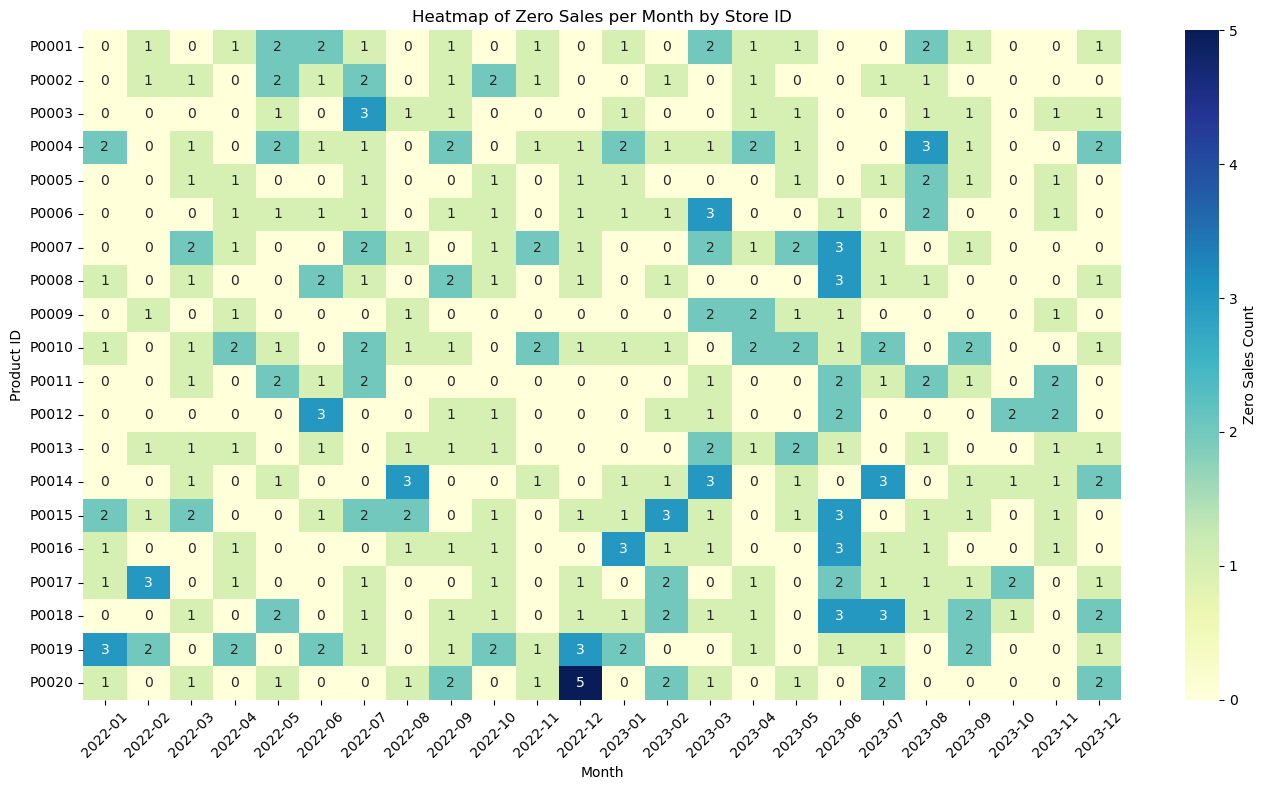

In [11]:
# Format month labels
monthly_zero_sales['Month'] = monthly_zero_sales['Month'].dt.strftime('%Y-%m')
# Pivot for heatmap
pivot_table = monthly_zero_sales.pivot(index='Product ID', columns='Month', values='Zero Sales Count').fillna(0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Zero Sales Count'})

plt.title('Heatmap of Zero Sales per Month by Store ID')
plt.xlabel('Month')
plt.ylabel('Product ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

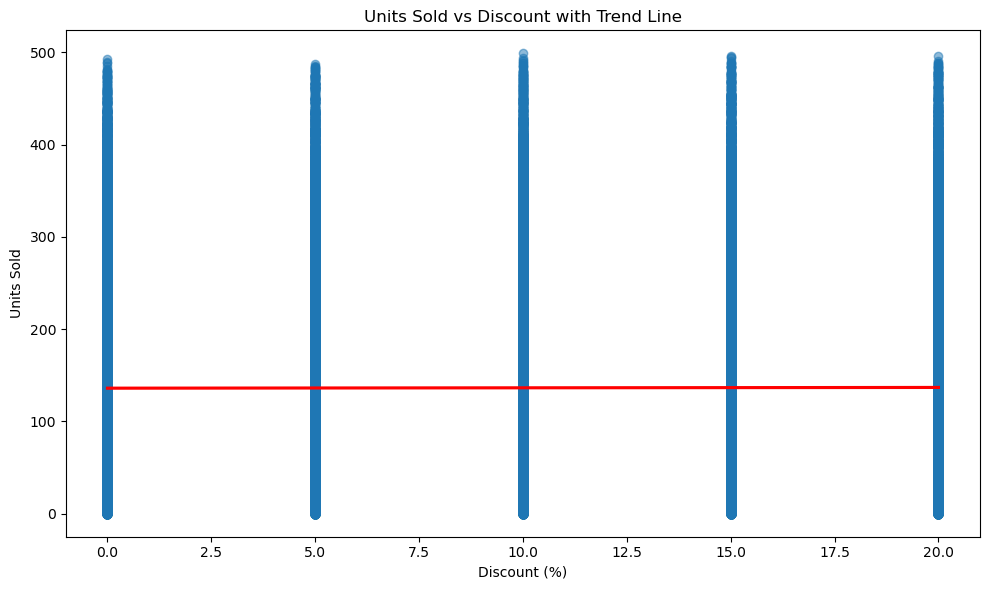

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Discount', y='Units Sold', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Units Sold vs Discount with Trend Line')
plt.xlabel('Discount (%)')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


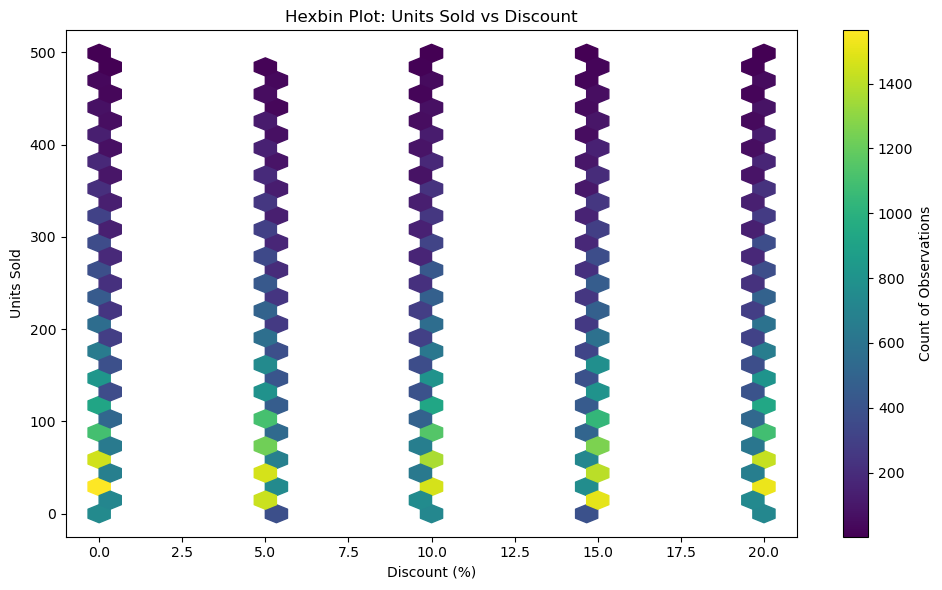

In [13]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Discount'], df['Units Sold'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count of Observations')
plt.xlabel('Discount (%)')
plt.ylabel('Units Sold')
plt.title('Hexbin Plot: Units Sold vs Discount')
plt.tight_layout()
plt.show()

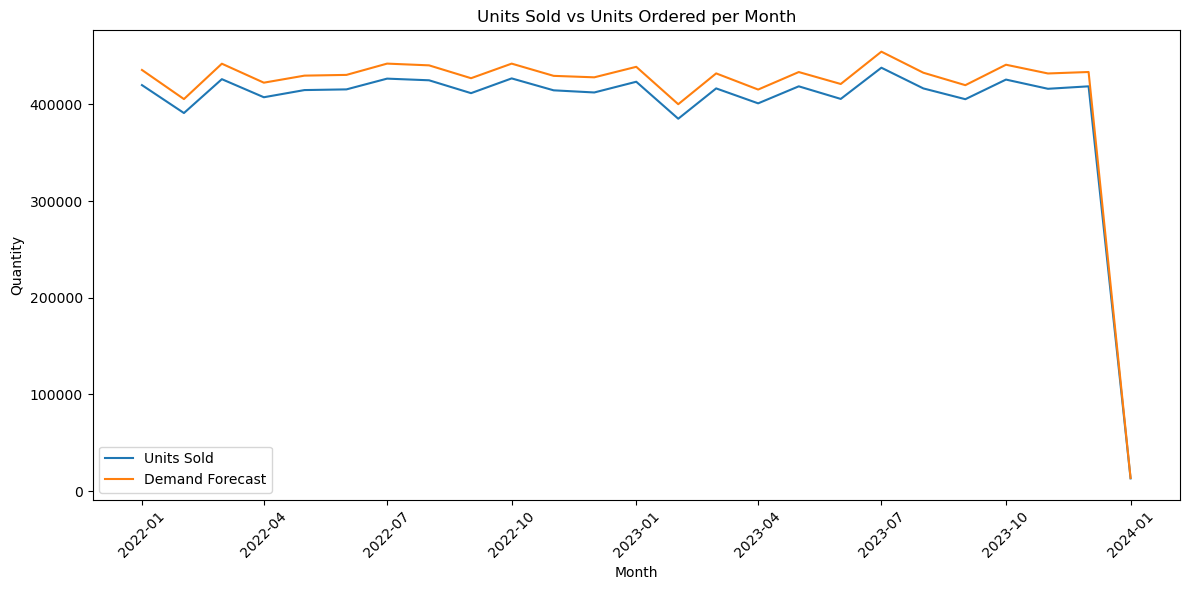

In [14]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp()
monthly_stats = df.groupby('Month').agg({
    'Units Sold': 'sum',
    'Demand Forecast': 'sum'  # or 'mean' depending on your preference
}).reset_index()
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_stats, x='Month', y='Units Sold', label='Units Sold')
sns.lineplot(data=monthly_stats, x='Month', y='Demand Forecast', label='Demand Forecast')

plt.title('Units Sold vs Units Ordered per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df = df.drop(columns=['Discount Bin', 'Zero Sales', 'Units Ordered'], errors='ignore')


In [16]:
del df['Seasonality']

In [17]:
df['Stock Turnover Rate'] = df['Units Sold'] / df['Inventory Level']

In [18]:
df.head(10)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Month,Stock Turnover Rate
0,1/1/2022,S001,P0001,Groceries,North,231,127,135.47,33.50,20,Rainy,0.0,29.69,2022-01-01,0.549784
1,1/1/2022,S001,P0002,Toys,South,204,150,144.04,63.01,20,Sunny,0.0,66.16,2022-01-01,0.735294
2,1/1/2022,S001,P0003,Toys,West,102,65,74.02,27.99,10,NaN,1.0,31.32,2022-01-01,0.637255
3,1/1/2022,S001,P0004,Toys,North,469,61,62.18,32.72,10,Cloudy,1.0,34.74,2022-01-01,0.130064
4,1/1/2022,S001,P0005,Electronics,East,166,14,9.26,73.64,0,Sunny,0.0,68.95,2022-01-01,0.084337
5,1/1/2022,S001,P0006,Groceries,South,138,128,139.82,76.83,10,Sunny,1.0,79.35,2022-01-01,0.927536
6,1/1/2022,S001,P0007,Furniture,East,359,97,108.92,34.16,10,Rainy,1.0,36.55,2022-01-01,0.270195
7,1/1/2022,S001,P0008,Clothing,North,380,312,329.73,97.99,5,NaN,0.0,100.09,2022-01-01,0.821053
8,1/1/2022,S001,P0009,Electronics,West,183,175,174.15,20.74,10,Cloudy,0.0,17.66,2022-01-01,0.956284
9,1/1/2022,S001,P0010,Toys,South,108,28,24.47,59.99,0,Rainy,1.0,61.21,2022-01-01,0.259259


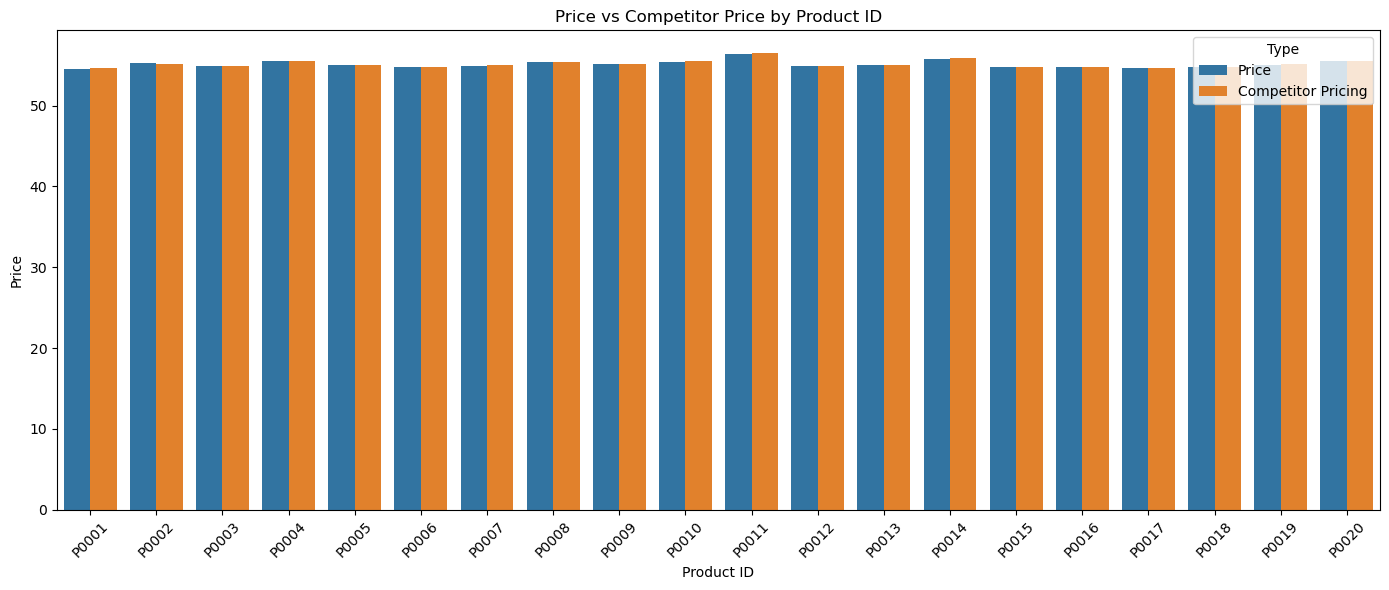

In [19]:
product_prices = df.groupby('Product ID')[['Price', 'Competitor Pricing']].mean().reset_index()  #aggregate
melted = product_prices.melt(id_vars='Product ID', value_vars=['Price', 'Competitor Pricing'],
                             var_name='Type', value_name='Value') #Melt
plt.figure(figsize=(14, 6)) #Plot
sns.barplot(data=melted, x='Product ID', y='Value', hue='Type')

plt.title('Price vs Competitor Price by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


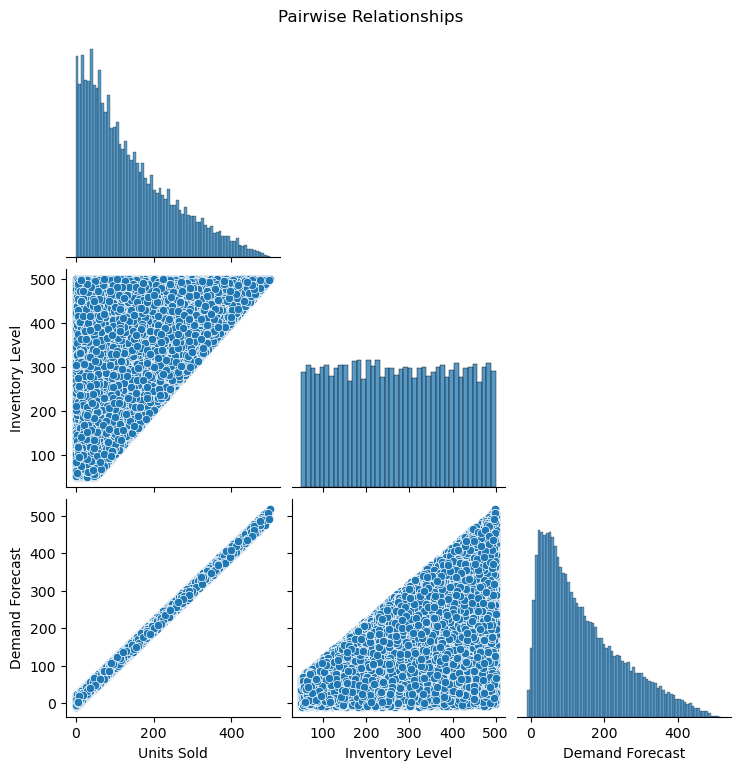

In [20]:
sns.pairplot(df[['Units Sold', 'Inventory Level', 'Demand Forecast']], corner=True)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

🔷 Left Plot: Units Sold vs Demand Forecast
This shows a very strong linear relationship — the points lie almost perfectly along a straight line.
✅ Interpretation:

It suggests that the demand forecast is a strong predictor of actual units sold.

Your forecasting model (if that’s what generated Demand Forecast) is likely doing a very good job.

🔷 Right Plot: Inventory Level vs Demand Forecast
This one is a bit more spread out, forming a triangular shape.
✅ Interpretation:

Inventory Level is usually ≥ Forecast, which makes sense: you want to stock more than you expect to sell.

But there’s more variability — sometimes a lot of inventory is held even when demand is low.

This could suggest overstocking or inconsistent inventory planning in some cases.



C:\Users\Mariam\AppData\Local\Temp\ipykernel_13096\3086817548.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', ci=None, palette='viridis')
C:\Users\Mariam\AppData\Local\Temp\ipykernel_13096\3086817548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', ci=None, palette='viridis')


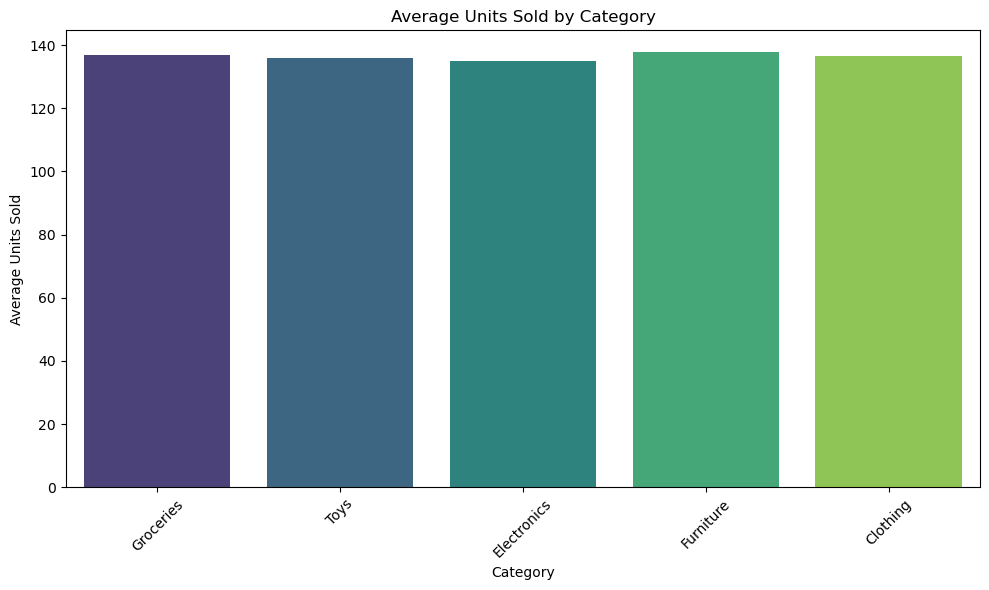

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', ci=None, palette='viridis')
plt.title('Average Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


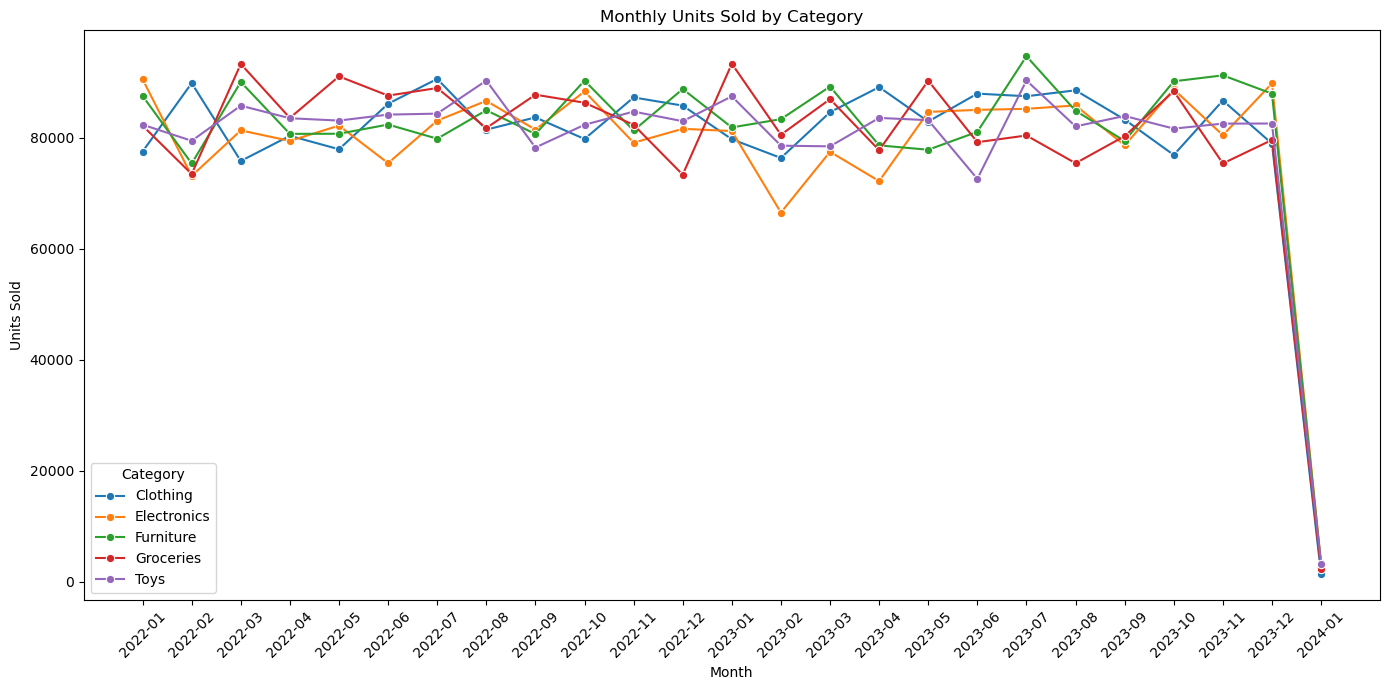

In [22]:
# First, convert to datetime and extract month if not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by Month and Category
monthly_sales = df.groupby(['Month', 'Category'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', hue='Category', marker='o')
plt.title('Monthly Units Sold by Category')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


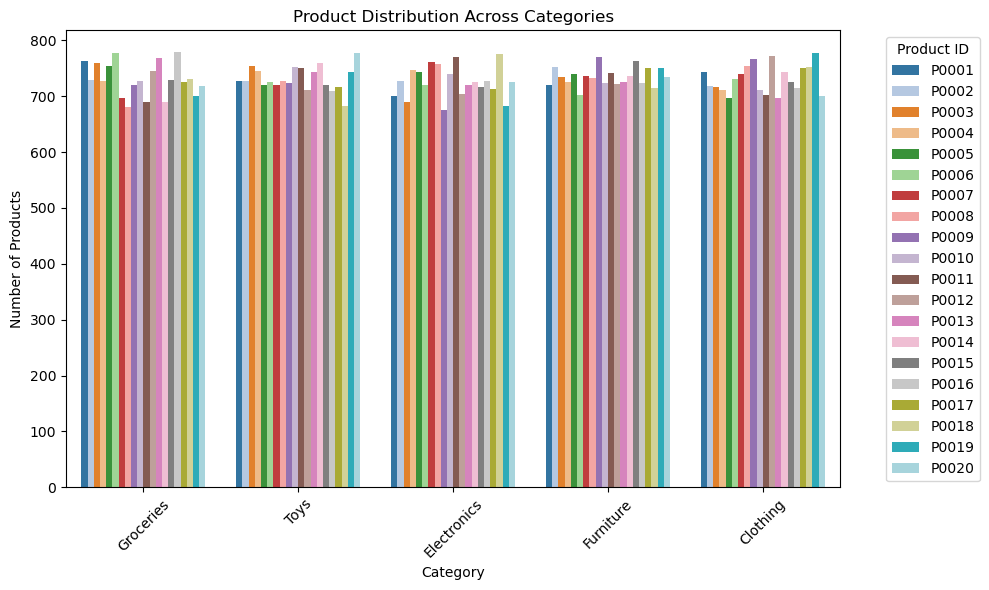

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Product ID', palette='tab20')
plt.title('Product Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product ID')
plt.tight_layout()
plt.show()
